In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [2]:
df = pd.read_csv('data/googleplaystore.csv')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

# Question 4: You choose what you want to investigate

Our question is - what category of apps are people more willing to pay for?

To do this, look at each category's share of the total downloads. We then compare that to the share of total paid downloads.

Categories with a great paid share than unpaid share indicate a disproporionate willingness on the part of consumers to pay for that kind of app.

In [191]:
# some preliminary exploration
df['Type'].value_counts()
paid_apps = df.loc[df['Type']=='Paid']
paid_apps['Category'].value_counts() 

# this cleans the 'installs' data. The first line is commented out because once executed, it will throw an error if executed again
# df['Installs'] = df['Installs'].apply(lambda x : x.replace('+', '').replace(',', '').strip()) 
df['Installs'] = df['Installs'].astype('int')

# this calculates the percent share of total downloads for each category and stores it in a dictionary
cat_percent_unpaid = {}
for cat in df['Category'].unique():
     cat_percent_unpaid[cat] = (df.loc[df['Category']==cat]['Installs'].sum() / df['Installs'].sum()) * 100
cat_percent_unpaid # this gives us each category's share of the total installs 

# this calculates the precent share of paid downloads for each category and stores it in a dictionary
cat_percent_paid = {}
for cat in paid_apps['Category'].unique():
     cat_percent_paid[cat] = (paid_apps.loc[df['Category']==cat]['Installs'].sum() / paid_apps['Installs'].sum()) * 100
cat_percent_paid # this gives us each category's share of the paid installs 

# here the dictionaries are turned into data frames and then merged
paid_by_cat = pd.DataFrame(list(cat_percent_paid.items()),columns = ['Category','Percentage of Paid Downloads']) 
paid_by_cat2 = pd.DataFrame(list(cat_percent_unpaid.items()),columns = ['Category','Percentage of Unpaid Downloads']) 
unified = pd.merge(paid_by_cat2, paid_by_cat)

# although not finally used, this is an additional piece of information that could be useful
unified['difference'] = unified['Percentage of Paid Downloads'] - unified['Percentage of Unpaid Downloads']
unified

Category  Percentage of Unpaid Downloads  \
0        Art And Design                        0.074173   
1     Auto And Vehicles                        0.031694   
2   Books And Reference                        1.146233   
3              Business                        0.597682   
4         Communication                       19.475397   
5                Dating                        0.157672   
6             Education                        0.519856   
7         Entertainment                        1.711568   
8                Events                        0.009529   
9               Finance                        0.522956   
10       Food And Drink                        0.163391   
11   Health And Fitness                        0.944366   
12   Libraries And Demo                        0.037580   
13            Lifestyle                        0.320726   
14                 Game                       20.930207   
15               Family                        6.119462   
16              Medical                        0.031770   
17               Social                        8.393235   
18             Shopping                        1.937471   
19          Photography                        6.018040   
20               Sports                        1.044645   
21     Travel And Local                        4.097564   
22                Tools                        6.832033   
23      Personalization                        1.387250   
24         Productivity                        8.456601   
25            Parenting                        0.018804   
26              Weather                        0.254186   
27        Video Players                        3.711672   
28   News And Magazines                        4.471851   
29  Maps And Navigation                        0.432063   

    Percentage of Paid Downloads  difference  
0                       0.021931   -0.052242  
1                       0.068740    0.037046  
2                       0.031959   -1.114274  
3                       0.565786   -0.031896  
4                       1.864204  -17.611193  
5                       0.029264   -0.128408  
6                       0.825154    0.305298  
7                       0.274138   -1.437430  
8                       0.000001   -0.009527  
9                       0.254402   -0.268553  
10                      0.082241   -0.081150  
11                      0.786925   -0.157440  
12                      0.000137   -0.037442  
13                      1.616192    1.295466  
14                     28.921462    7.991255  
15                     42.863890   36.744428  
16                      1.398147    1.366376  
17                      0.008224   -8.385011  
18                      0.013844   -1.923627  
19                      5.453610   -0.564431  
20                      1.704882    0.660237  
21                      0.250918   -3.846646  
22                      2.367782   -4.464251  
23                      7.208164    5.820914  
24                      1.935486   -6.521115  
25                      0.068671    0.049868  
26                      1.112998    0.858812  
27                      0.097319   -3.614353  
28                      0.007539   -4.464312  
29                      0.165990   -0.266073

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

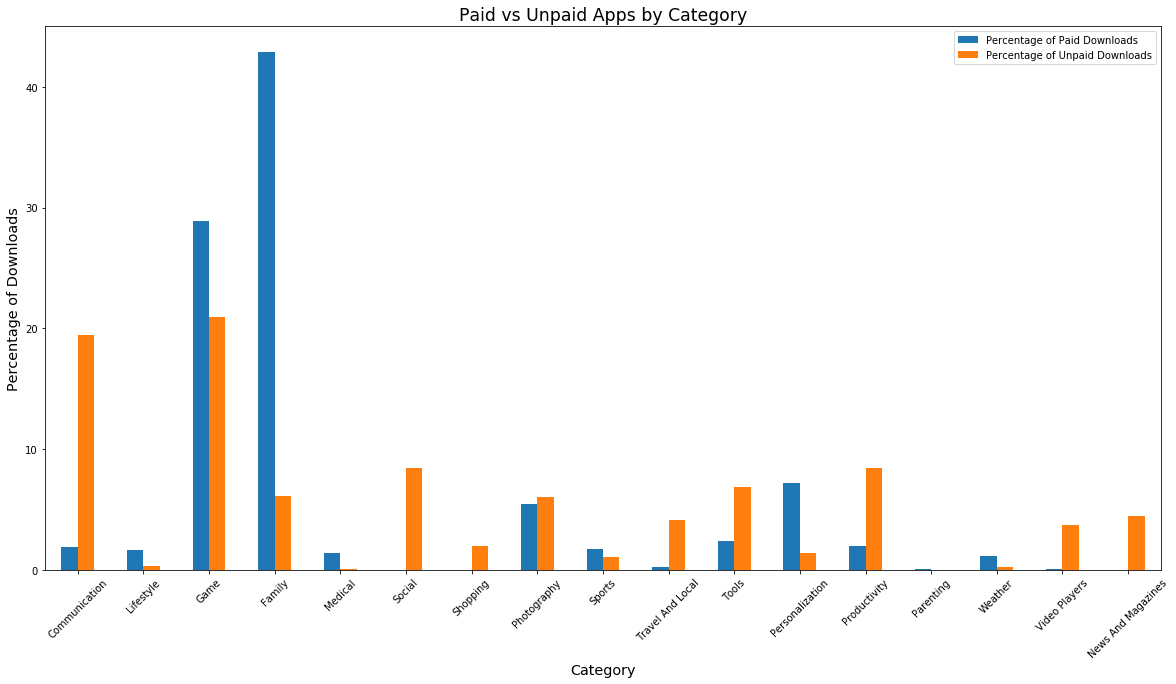

In [211]:
# we build our graph
# first drop those categories for which there is no interesting difference; this removes clutter from the data
unified_for_graph = unified.drop([2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 29])

# then plot it out!
df2 = pd.DataFrame({'Percentage of Paid Downloads': list(unified_for_graph['Percentage of Paid Downloads']) ,
                   'Percentage of Unpaid Downloads': list(unified_for_graph['Percentage of Unpaid Downloads'])}, index=unified_for_graph['Category'])
ax = df2.plot.bar(rot=0, figsize=(20,10))
ax.set_title('Paid vs Unpaid Apps by Category', size='xx-large')
ax.set_xlabel('Category', size='x-large')
ax.set_ylabel('Percentage of Downloads', size='x-large')
plt.xticks(rotation=45)


In [204]:
unified_for_graph

Category  Percentage of Unpaid Downloads  \
4        Communication                       19.475397   
10      Food And Drink                        0.163391   
13           Lifestyle                        0.320726   
14                Game                       20.930207   
15              Family                        6.119462   
16             Medical                        0.031770   
17              Social                        8.393235   
18            Shopping                        1.937471   
19         Photography                        6.018040   
20              Sports                        1.044645   
21    Travel And Local                        4.097564   
22               Tools                        6.832033   
23     Personalization                        1.387250   
24        Productivity                        8.456601   
25           Parenting                        0.018804   
26             Weather                        0.254186   
27       Video Players                        3.711672   
28  News And Magazines                        4.471851   

    Percentage of Paid Downloads  difference  
4                       1.864204  -17.611193  
10                      0.082241   -0.081150  
13                      1.616192    1.295466  
14                     28.921462    7.991255  
15                     42.863890   36.744428  
16                      1.398147    1.366376  
17                      0.008224   -8.385011  
18                      0.013844   -1.923627  
19                      5.453610   -0.564431  
20                      1.704882    0.660237  
21                      0.250918   -3.846646  
22                      2.367782   -4.464251  
23                      7.208164    5.820914  
24                      1.935486   -6.521115  
25                      0.068671    0.049868  
26                      1.112998    0.858812  
27                      0.097319   -3.614353  
28                      0.007539   -4.464312